In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv("temperatures.csv")
d

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [3]:
d.shape

(117, 18)

In [4]:
d.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [5]:
d.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [6]:
d.isnull().sum().sum()

0

In [7]:
d.corr()["ANNUAL"].sort_values()

JUN        0.520189
JUL        0.588454
MAY        0.609015
MAR        0.689205
SEP        0.730756
JAN        0.749880
AUG        0.755384
OCT        0.768170
APR        0.770596
FEB        0.792541
YEAR       0.801129
JUN-SEP    0.810786
NOV        0.812868
DEC        0.843660
JAN-FEB    0.849828
MAR-MAY    0.853277
OCT-DEC    0.897046
ANNUAL     1.000000
Name: ANNUAL, dtype: float64

# Highly Correlated Model

In [8]:
y=d[['ANNUAL']]
x=d[['DEC']]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=0)

In [10]:
model=LinearRegression()

In [11]:
model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)

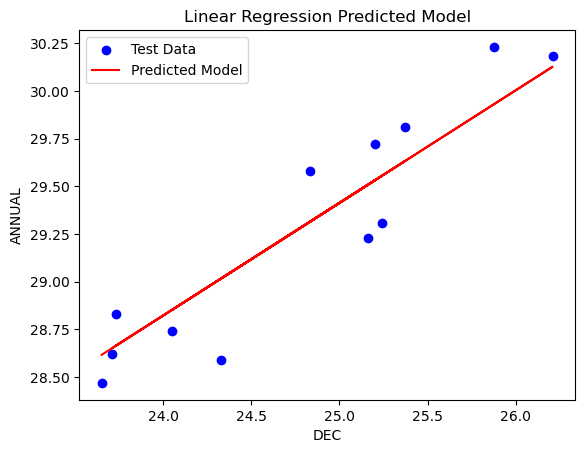

In [13]:
plt.scatter(x_test,y_test,color='blue',label='Test Data')
plt.plot(x_test,y_pred_test,color="red",label='Predicted Model')
plt.xlabel('DEC')
plt.ylabel('ANNUAL')
plt.title('Linear Regression Predicted Model')
plt.legend()
plt.show()

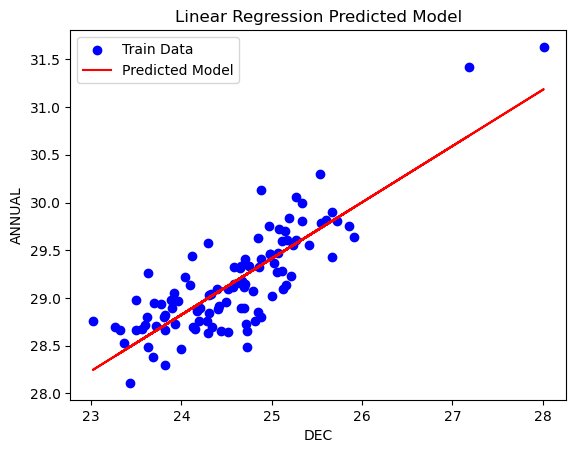

In [14]:
plt.scatter(x_train,y_train,color='blue',label='Train Data')
plt.plot(x_train,y_pred_train,color="red",label='Predicted Model')
plt.xlabel('DEC')
plt.ylabel('ANNUAL')
plt.title('Linear Regression Predicted Model')
plt.legend()
plt.show()

In [15]:
#Training Evaluation

print("MSE : ",mean_squared_error(y_pred_train,y_train))
print("MAE : ",mean_absolute_error(y_pred_train,y_train))
print("R2 Score : ",r2_score(y_pred_train,y_train))

#Testing Evaluation

print("MSE : ",mean_squared_error(y_pred_test,y_test))
print("MAE : ",mean_absolute_error(y_pred_test,y_test))
print("R2 Score : ",r2_score(y_pred_test,y_test))


MSE :  0.09249599733574487
MAE :  0.23915864625099248
R2 Score :  0.5509671777393984
MSE :  0.05116360988421089
MAE :  0.1996562626437409
R2 Score :  0.7895374373019817


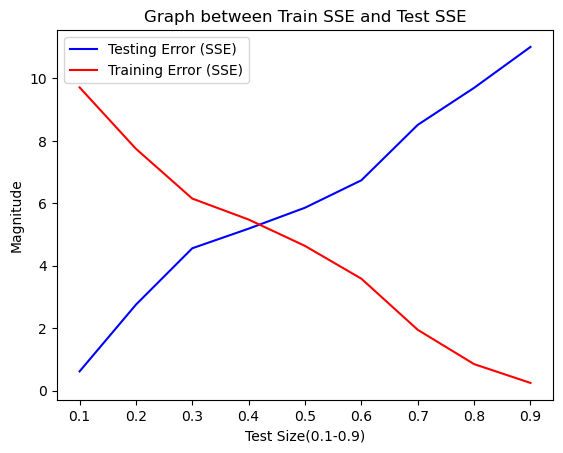

In [16]:
train_sse=[]
test_sse=[]
testing_size=[]

for test_size in range(1,10):
    test_size/=10.0
    testing_size.append(test_size)
    
    # Split Data
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=0)
    
    # Create and train Linear Regression Model
    model= LinearRegression()
    model.fit(x_train,y_train)
    
    # Calculate SSE for training Data
    y_pred_train=model.predict(x_train)
    train_sse.append(np.sum((y_pred_train-y_train)**2))
    
    # Calculate SSE for testing Data
    y_pred_test=model.predict(x_test)
    test_sse.append(np.sum((y_pred_test-y_test)**2))
    
# Plot the SSE for different test sizes

plt.plot(testing_size,test_sse,color='blue',label='Testing Error (SSE)')
plt.plot(testing_size,train_sse,color='red',label='Training Error (SSE)')
plt.title('Graph between Train SSE and Test SSE')
plt.xlabel('Test Size(0.1-0.9)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

# Least Correlated Model 

In [17]:
y1=d[['ANNUAL']]
x1=d[['JUN']]

In [18]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.10,random_state=0)

In [19]:
model.fit(x1_train,y1_train)

LinearRegression()

In [26]:
model.intercept_

array([20.60994093])

In [20]:
y1_pred_train=model.predict(x1_train)
y1_pred_test=model.predict(x1_test)

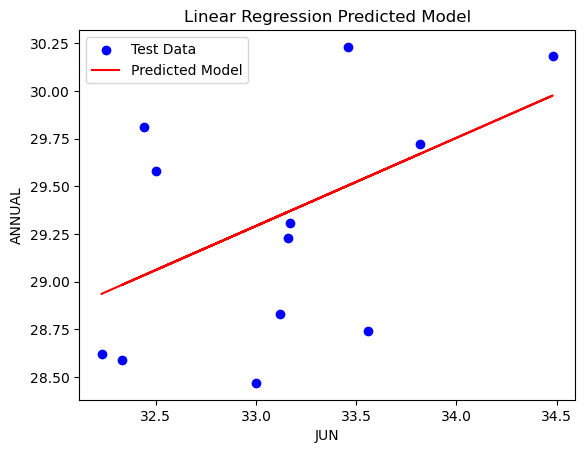

In [21]:
plt.scatter(x1_test,y1_test,color='blue',label='Test Data')
plt.plot(x1_test,y1_pred_test,color='red',label='Predicted Model')
plt.xlabel("JUN")
plt.ylabel('ANNUAL')
plt.title('Linear Regression Predicted Model')
plt.legend()
plt.show()

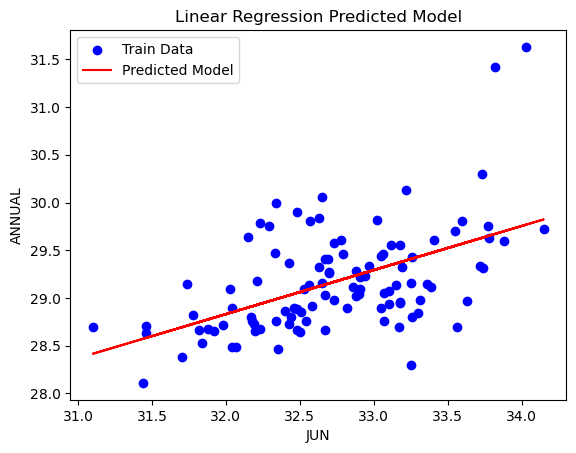

In [22]:
plt.scatter(x1_train,y1_train,color='blue',label='Train Data')
plt.plot(x1_train,y1_pred_train,color='red',label='Predicted Model')
plt.xlabel("JUN")
plt.ylabel('ANNUAL')
plt.title('Linear Regression Predicted Model')
plt.legend()
plt.show()

In [23]:
#Training Evaluation

print("MSE : ",mean_squared_error(y1_pred_train,y1_train))
print("MAE : ",mean_absolute_error(y1_pred_train,y1_train))
print("R2 Score : ",r2_score(y1_pred_train,y1_train))

#Testing Evaluation

print("MSE : ",mean_squared_error(y1_pred_test,y1_test))
print("MAE : ",mean_absolute_error(y1_pred_test,y1_test))
print("R2 Score : ",r2_score(y1_pred_test,y1_test))


MSE :  0.21714787294693358
MAE :  0.34307278577406974
R2 Score :  -1.6697136427031136
MSE :  0.2766902939445312
MAE :  0.4442906531373838
R2 Score :  -2.163687830672311


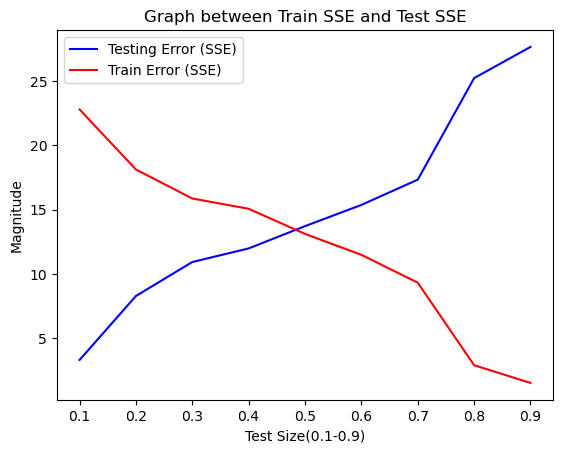

In [24]:
train_sse=[]
test_sse=[]
testing_size=[]

for test_size in range(1,10):
    test_size/=10.0
    testing_size.append(test_size)
    
    # Split Data
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=test_size,random_state=0)
    
    # Create and train Linear Regression Model
    model= LinearRegression()
    model.fit(x1_train,y1_train)
    
    # Calculate SSE for training Data
    y1_pred_train=model.predict(x1_train)
    train_sse.append(np.sum((y1_pred_train-y1_train)**2))
    
    # Calculate SSE for testing Data
    y1_pred_test=model.predict(x1_test)
    test_sse.append(np.sum((y1_pred_test-y1_test)**2))
    
# Plot the SSE for different test sizes

plt.plot(testing_size,test_sse,color='blue',label='Testing Error (SSE)')
plt.plot(testing_size,train_sse,color='red',label='Train Error (SSE)')
plt.title('Graph between Train SSE and Test SSE')
plt.xlabel('Test Size(0.1-0.9)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()